In [73]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [74]:
model = YOLO("yolo11n-seg.pt")

In [75]:
img_path = r'C:\Users\onurb\master\computer_vision\projet\CSC_51073_EP-Project\CSC_51073_EP-Project\data\DSCF4667.png'
image = plt.imread(img_path)
img_size = image.shape

In [76]:
results = model(img_path)


image 1/1 C:\Users\onurb\master\computer_vision\projet\CSC_51073_EP-Project\CSC_51073_EP-Project\data\DSCF4667.png: 448x640 1 bottle, 1 wine glass, 1 cup, 1 bowl, 1 chair, 1 couch, 1 tv, 1 teddy bear, 65.3ms
Speed: 4.0ms preprocess, 65.3ms inference, 6.0ms postprocess per image at shape (1, 3, 448, 640)


In [77]:
print(type(results[0].masks.data))
#results[0].save(filename="deneme.png")
results[0].show()

<class 'torch.Tensor'>


Evaluation

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1, "..\\Image_Segmentation")
import evaluation

(1038, 1557)


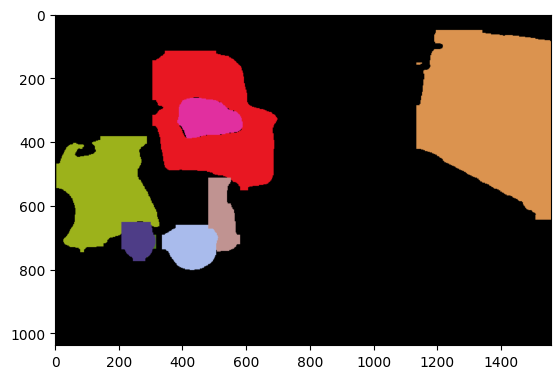

In [79]:
# get prediction masks
prediction_tensor = results[0].masks.data

masks = []
for i in range(prediction_tensor.shape[0]):
    resized_mask = cv2.resize(np.array(prediction_tensor[i].cpu()), (img_size[1], img_size[0]), interpolation=cv2.INTER_LINEAR)
    masks.append(resized_mask)

segmentation_map = evaluation.generate_segmentation_map(masks)

print(masks[0].shape)

plt.imshow(segmentation_map)

Get ground truth mask

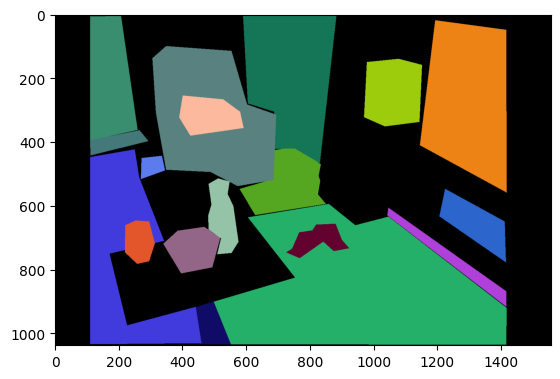

In [80]:
label_png = r"..\\labels\\DSCF4667\\label.png" #this is generated by lableme

lbl = np.asarray(Image.open(label_png))
nb_labels = np.max(np.unique(lbl))
gt_masks = [np.where(lbl == i, 1, 0) for i in range(1,nb_labels+1)]

segmentation_map = evaluation.generate_segmentation_map(gt_masks)
plt.imshow(segmentation_map)

the max ious of mask 0 is: 1 with iou = 0.5518094491475812
the max ious of mask 1 is: 16 with iou = 0.809361152141802
the max ious of mask 2 is: 2 with iou = 0.8007599145096177
the max ious of mask 3 is: 12 with iou = 0.8861203998623598
the max ious of mask 4 is: 11 with iou = 0.33549270143949234
the max ious of mask 5 is: 9 with iou = 0.8108222542128884
the max ious of mask 6 is: 9 with iou = 0.819816733750107
the max ious of mask 7 is: 17 with iou = 0.8240810419681621


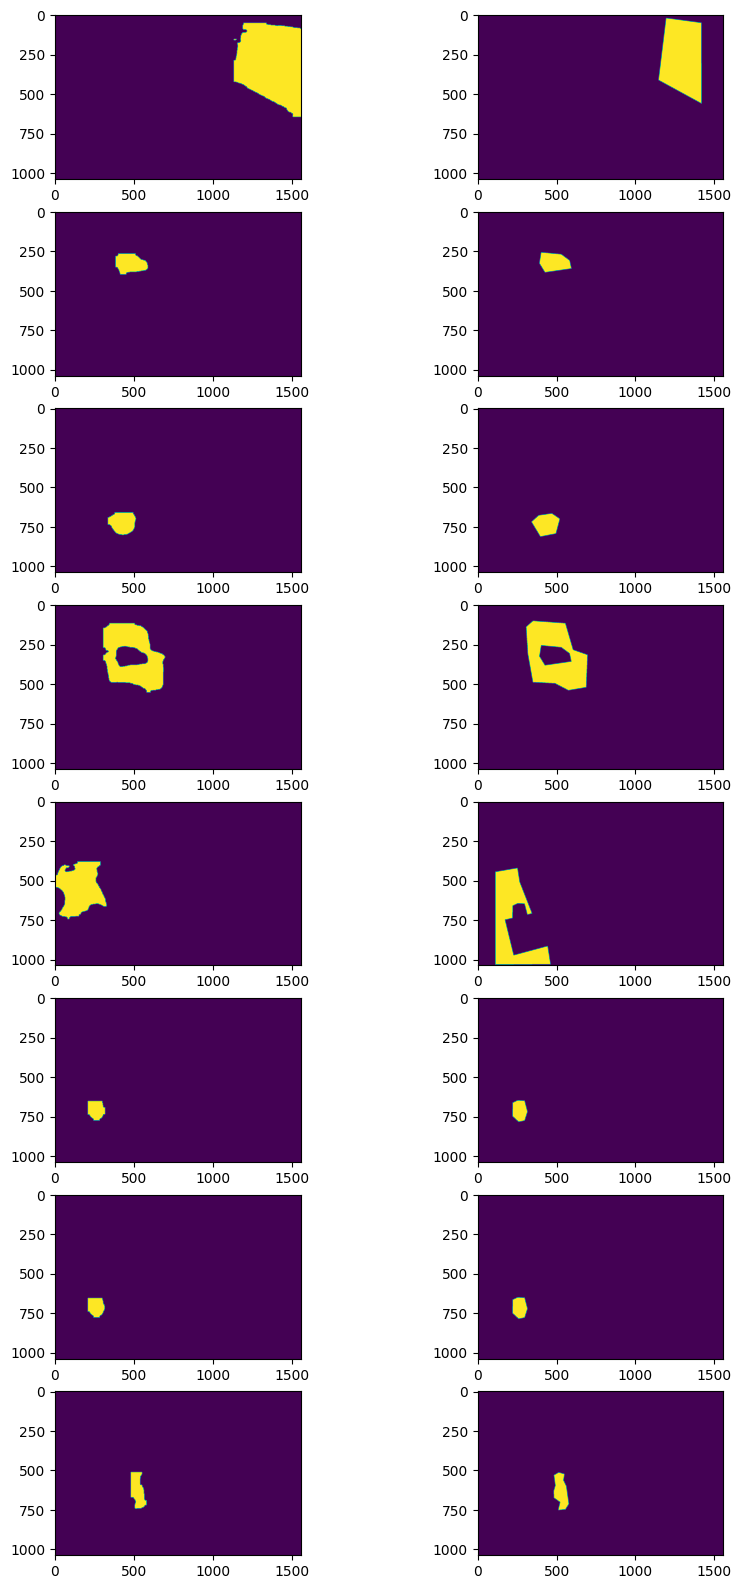

In [82]:
#evaluate the model
ious = evaluation.get_ious_from_masks(masks, gt_masks)

for i in range(len(ious)):
    print(f"the max ious of mask {i} is: {ious[i][1]} with iou = {ious[i][0]}")

#evaluate the model
ious = evaluation.get_ious_from_masks(masks, gt_masks)

best_match_num = len(masks)
fig, ax = plt.subplots(best_match_num, 2, figsize=(10, 20))  # 1 row, 2 columns

for i in range(best_match_num):
    ax[i,0].imshow(masks[i])
    ax[i,1].imshow(gt_masks[ious[i][1]])